# DBSCAN

In [153]:
# ############################################################
# This code is from following the linked example below
# - https://youtu.be/2eDFjw456AM
# - https://github.com/siddiquiamir/Python-Clustering-Tutorials/blob/main/DBSCAN.ipynb
# ############################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
df = pd.read_csv("data/Herl-reduced.csv")

In [155]:
df.head()

,person_w_disabilty___1,person_w_disabilty___2,person_w_disabilty___3,person_w_disabilty___4,person_w_disabilty___5,person_w_disabilty___6,person_w_disabilty___7,activities_access___1,activities_access___2,activities_access___3,activities_access___4,activities_access___5,activities_access___6,income,age,zip_cd
0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,4,80005
1,1,0,0,1,0,0,0,1,0,0,0,0,0,6,8,15131
2,0,1,1,0,0,0,0,1,0,0,0,0,0,4,4,8876
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,3,15213
4,0,1,1,1,1,1,0,1,0,0,0,0,0,1,8,8822


In [156]:
df.tail()

,person_w_disabilty___1,person_w_disabilty___2,person_w_disabilty___3,person_w_disabilty___4,person_w_disabilty___5,person_w_disabilty___6,person_w_disabilty___7,activities_access___1,activities_access___2,activities_access___3,activities_access___4,activities_access___5,activities_access___6,income,age,zip_cd
904,0,0,0,1,1,0,0,1,1,1,1,1,1,6,7,89120
905,1,0,0,1,1,1,0,1,1,1,1,1,1,3,5,10310
906,0,0,0,1,0,0,0,1,1,1,1,1,1,6,3,94402
907,0,0,0,1,0,0,0,1,1,1,1,1,1,3,4,28078
908,0,0,0,1,1,0,0,1,1,1,1,1,1,3,7,36805


In [157]:
df.shape

(909, 16)

In [158]:
df = df.iloc[:, :].values

In [159]:
df

array([[    0,     1,     0, ...,     2,     4, 80005],
       [    1,     0,     0, ...,     6,     8, 15131],
       [    0,     1,     1, ...,     4,     4,  8876],
       ...,
       [    0,     0,     0, ...,     6,     3, 94402],
       [    0,     0,     0, ...,     3,     4, 28078],
       [    0,     0,     0, ...,     3,     7, 36805]], dtype=int64)

In [160]:

# source: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#:~:text=DBSCAN%20(Density%2DBased%20Spatial%20Clustering,contains%20clusters%20of%20similar%20density.

# information on finding parameters: http://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/ 
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=5, min_samples=16).fit(df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 795


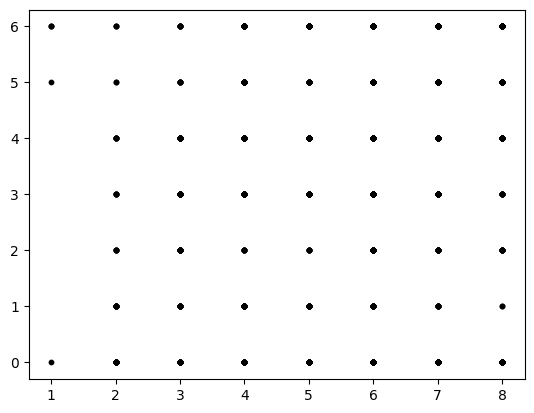

In [161]:
# rest of this stuff is for visualization
# todo: find a better way to visualize this high of a dimension
plt.scatter(df[:,-2], df[:,-3], s=10, c= "black")

In [162]:
from sklearn.cluster import KMeans

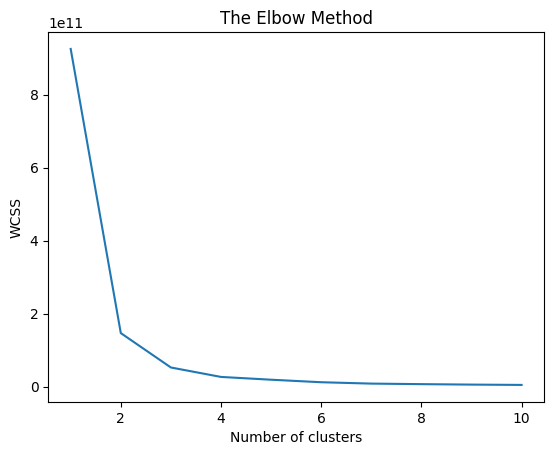

In [163]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i,
    init = 'k-means++', max_iter= 300, n_init= 10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [164]:
from sklearn.cluster import DBSCAN

In [165]:
dbscan = DBSCAN(eps=5, min_samples=16)

In [166]:
labels = dbscan.fit_predict(df)

In [167]:
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

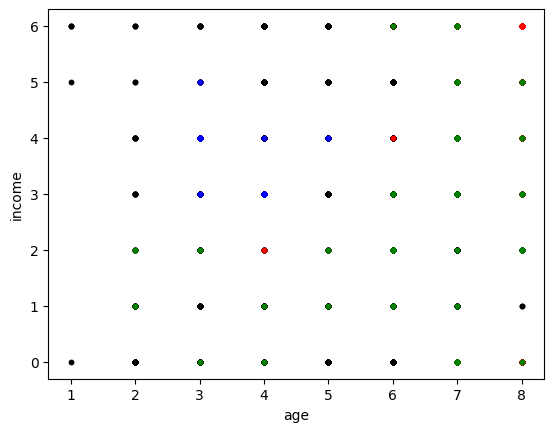

In [168]:
# Visualising the clusters
plt.scatter(df[labels == -1, -2], df[labels == -1, -3], s = 10, c = 'black') 

plt.scatter(df[labels == 0, -2], df[labels == 0, -3], s = 10, c = 'blue')
plt.scatter(df[labels == 1, -2], df[labels == 1, -3], s = 10, c = 'red')
plt.scatter(df[labels == 2, -2], df[labels == 2, -3], s = 10, c = 'green')
plt.scatter(df[labels == 3, -2], df[labels == 3, -3], s = 10, c = 'brown')
plt.scatter(df[labels == 4, -2], df[labels == 4, -3], s = 10, c = 'pink')
plt.scatter(df[labels == 5, -2], df[labels == 5, -3], s = 10, c = 'yellow')      
plt.scatter(df[labels == 6, -2], df[labels == 6, -3], s = 10, c = 'silver')

plt.xlabel('age')
plt.ylabel('income')
plt.show()